In [1]:
"""
@Description :   Digit recognition
@Author      :   Xubo Luo 
@Time        :   2024/04/04 12:41:38
"""

'\n@Description :   Digit recognition\n@Author      :   Xubo Luo \n@Time        :   2024/04/04 12:41:38\n'

# 导入必要库

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import argparse
from net import *
from utils.dataloader import LoadData

# 准备数据

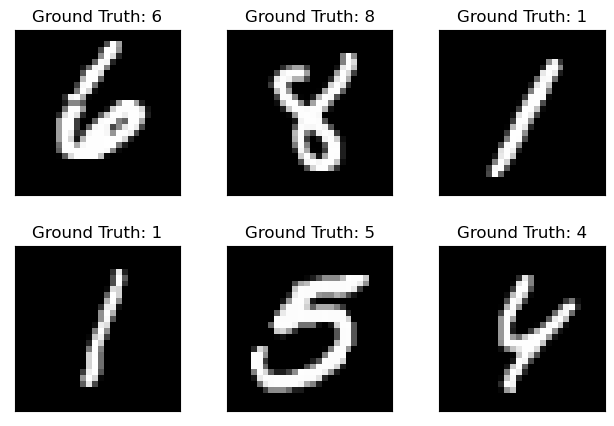

In [2]:
data_path = '../../Dataset/mnist'
batch_size_train = 64
batch_size_test = 1000
n_epochs = 10

train_loader, test_loader = LoadData(data_path, batch_size_train, batch_size_test)
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
test_counter = [i * len(train_loader.dataset) for i in range(n_epochs + 1)]

# Example data
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])


# 定义模型

In [5]:
# Vanilla CNN
vanilla_cnn_model = Vanilla_CNN()
network_state_dict = torch.load('./caches/vanilla_cnn_model.pth')
vanilla_cnn_model.load_state_dict(network_state_dict)

# Residual CNN
residual_cnn_model = ResCNN()
network_state_dict = torch.load('./caches/res_cnn_model.pth')
residual_cnn_model.load_state_dict(network_state_dict)

# Vision Transformer
transformer_model = Vanilla_Transformer(1, 64, 6, 4, 2, 28, 4, 10)
network_state_dict = torch.load('./caches/vanilla_transformer_model.pth')
transformer_model.load_state_dict(network_state_dict)

def test(network):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            output = output.to('cpu')
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [7]:
print('Vanilla CNN')
test(vanilla_cnn_model)
print('---------------------------------')

print('Residual CNN')
test(residual_cnn_model)
print('---------------------------------')

print('Vision Transformer')
test(transformer_model)
print('---------------------------------')

Vanilla CNN

Test set: Avg. loss: 0.0350, Accuracy: 9893/10000 (99%)

---------------------------------
Residual CNN

Test set: Avg. loss: 0.0278, Accuracy: 9930/10000 (99%)

---------------------------------
Vision Transformer

Test set: Avg. loss: 0.0814, Accuracy: 9741/10000 (97%)

---------------------------------
